# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.020988e+01     7.008147e+00
 * time: 0.0024271011352539062
     1     2.967582e+01     4.744172e+00
 * time: 0.06587696075439453
     2     2.236967e+01     6.216185e+00
 * time: 0.07260799407958984
     3     2.043456e+01     9.024741e+00
 * time: 0.0774080753326416
     4     1.732280e+01     6.689745e+00
 * time: 0.08194112777709961
     5     1.406056e+01     5.833504e+00
 * time: 0.08695006370544434
     6     1.016289e+01     1.912775e+00
 * time: 0.09180903434753418
     7     9.268130e+00     1.957698e+00
 * time: 0.09606695175170898
     8     8.790636e+00     1.001108e+00
 * time: 0.10052204132080078
     9     8.603900e+00     7.180404e-01
 * time: 0.10565614700317383
    10     8.559091e+00     1.185315e+00
 * time: 0.10938715934753418
    11     8.514074e+00     9.832873e-01
 * time: 0.1127171516418457
    12     8.455569e+00     7.199953e-01
 * time: 0.11668014526367188
    13     8.378670e+00     8.131555e-01
 * time:

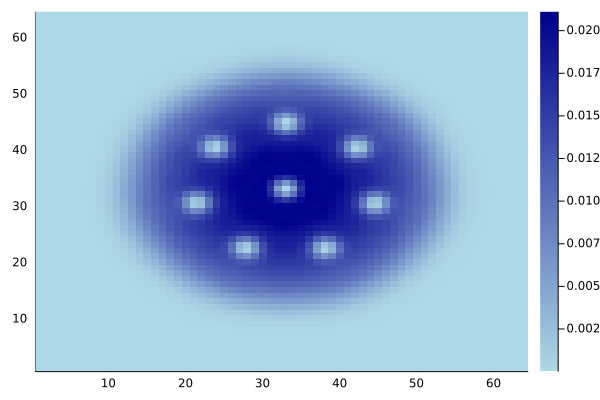

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)